# PRJNA1238906 - Opeyemi et al.

Article link: [https://www.researchsquare.com/article/rs-6228463/v1](https://www.researchsquare.com/article/rs-6228463/v1).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})


In [2]:
coco <- read.csv(here("data/processed/PRJNA1238906_processed.csv.gz"))
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>
1,10025,+10026.A,ins:10026:1,0,15,0,SRR32796412,2022-11-10,At20221110,229,316644871,PRJNA1238906,At,NA
2,10046,+10047.T,ins:10047:1,0,14,0,SRR32796412,2022-11-10,At20221110,229,316644871,PRJNA1238906,At,NA
3,10133,+10134.T,ins:10134:1,0,1961,0,SRR32796412,2022-11-10,At20221110,229,316644871,PRJNA1238906,At,NA
4,10364,+10365.T,ins:10365:1,0,2811,0,SRR32796412,2022-11-10,At20221110,229,316644871,PRJNA1238906,At,NA
5,10386,+10387.T,ins:10387:1,0,2772,0,SRR32796412,2022-11-10,At20221110,229,316644871,PRJNA1238906,At,NA
6,10427,+10428.T,ins:10428:1,0,2315,0,SRR32796412,2022-11-10,At20221110,229,316644871,PRJNA1238906,At,NA


In [3]:
lineages_in_paper <- c("BA.2.75", "BA.5", "BQ.1", "XBB.1.5", "BF.7")
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]   5 117

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
  2.278   0.071   2.490 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>
1,3.402775e-01,NA,NA,XBB.1.5,SRR32796412,2022-11-10,At20221110,229,316644871,PRJNA1238906,At,NA
2,2.862301e-03,NA,NA,BA.2.75,SRR32796412,2022-11-10,At20221110,229,316644871,PRJNA1238906,At,NA
3,3.618819e-01,NA,NA,BQ.1,SRR32796412,2022-11-10,At20221110,229,316644871,PRJNA1238906,At,NA
4,2.866934e-01,NA,NA,BF.7,SRR32796412,2022-11-10,At20221110,229,316644871,PRJNA1238906,At,NA
5,2.857095e-08,NA,NA,BA.5,SRR32796412,2022-11-10,At20221110,229,316644871,PRJNA1238906,At,NA
6,9.090393e-02,NA,NA,XBB.1.5,SRR32796413,2023-01-11,At20230111,198,290486003,PRJNA1238906,At,NA


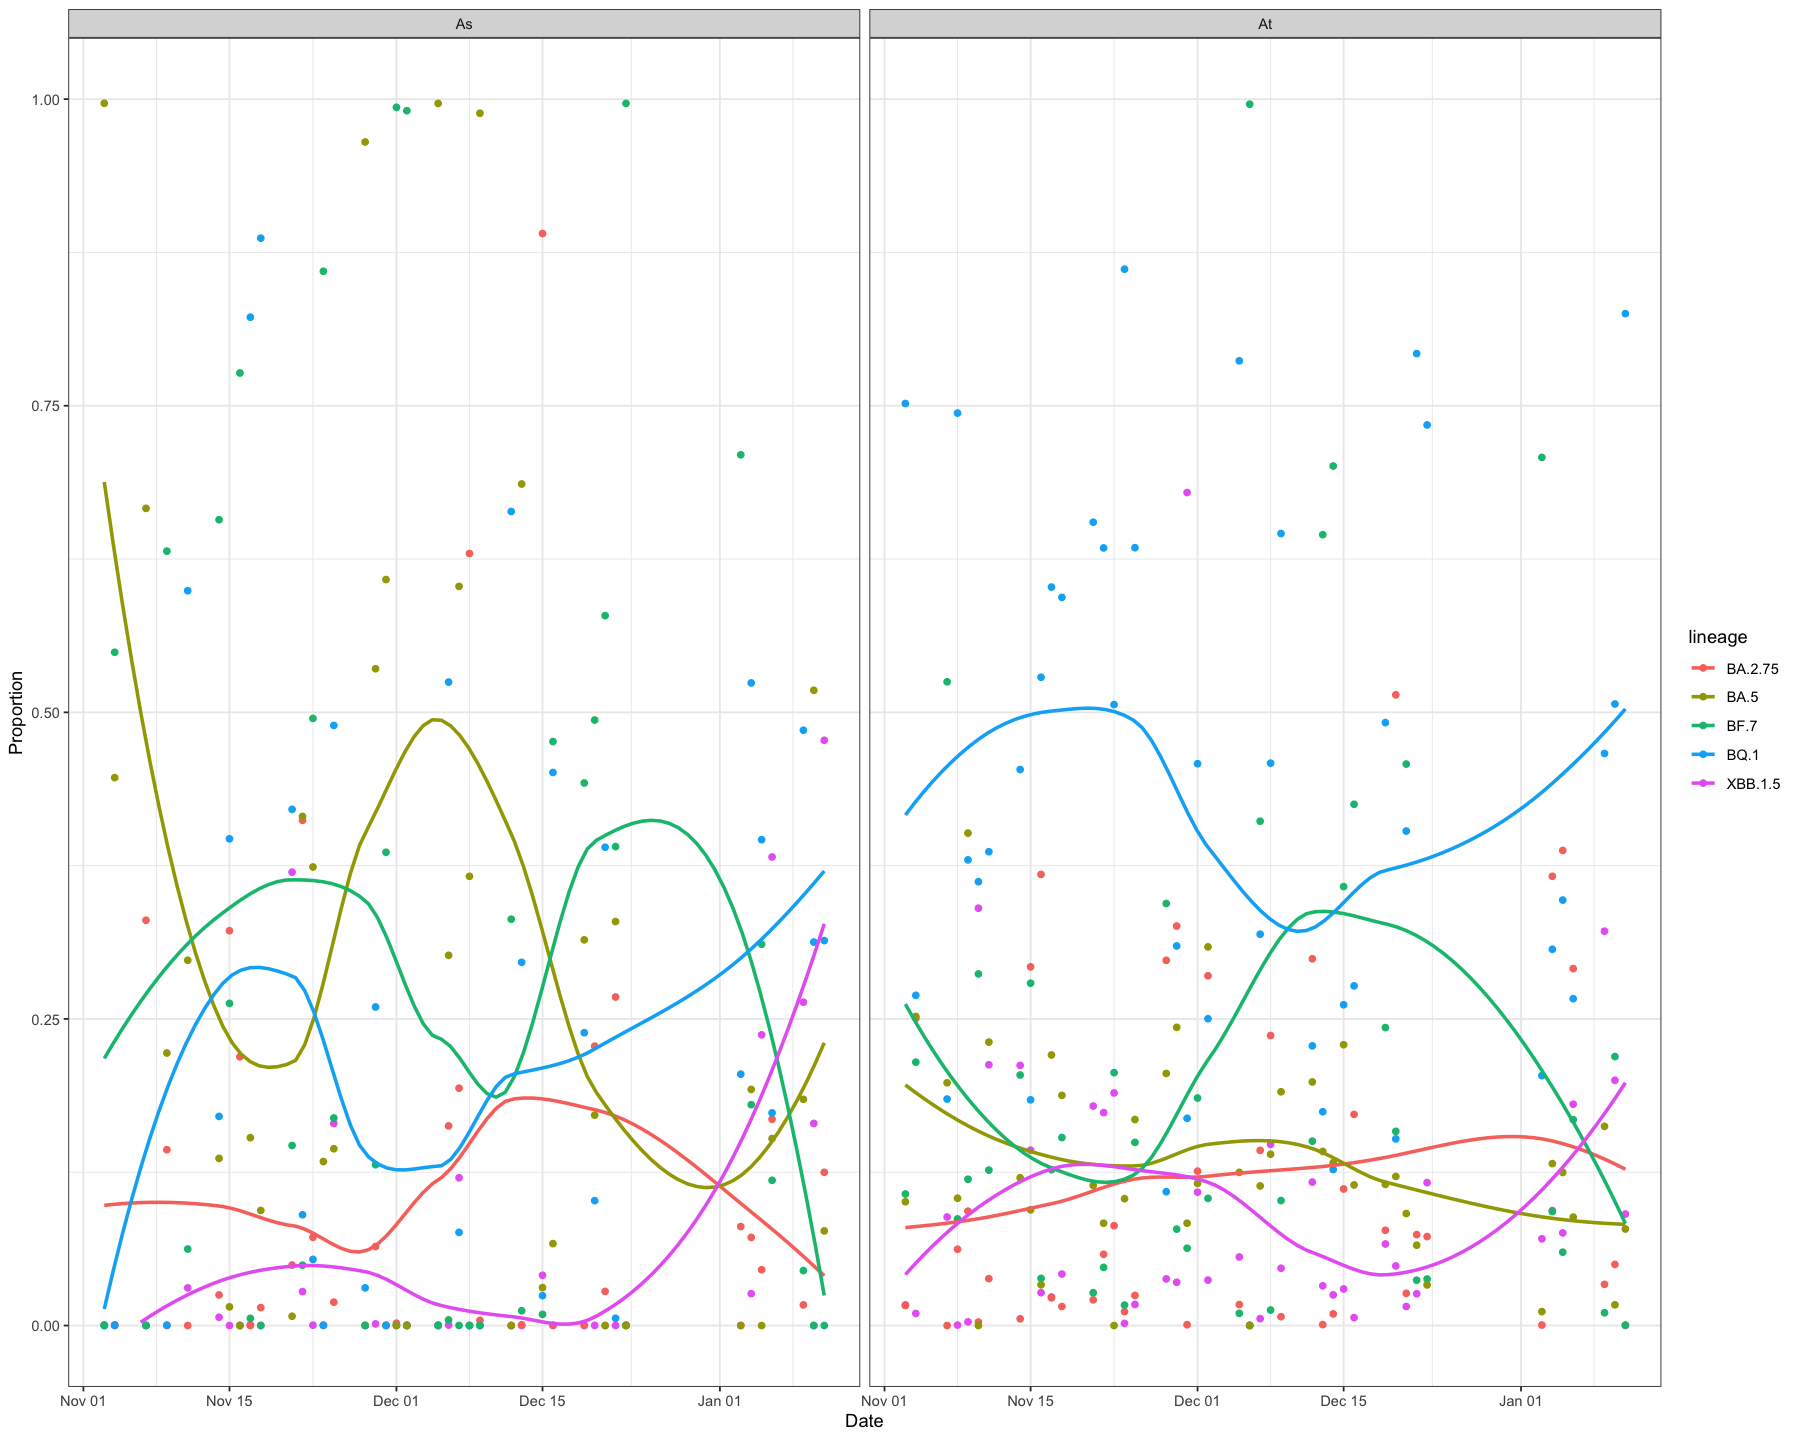

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
